<a href="https://colab.research.google.com/github/Blaze10/DL/blob/main/overfitting/overfitting_DataLoader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import seaborn as sns
from IPython import display
display.set_matplotlib_formats('svg')
from sklearn.model_selection import train_test_split

## Importing the dataset

In [23]:
iris = sns.load_dataset('iris')
data = torch.tensor(iris[iris.columns[:4]].values).float()
labels = torch.zeros(len(data), dtype=torch.long)

In [4]:
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [24]:
labels[iris.species == 'versicolor'] = 1
labels[iris.species == 'virginica'] = 2

## Brief aside on using dataloader

In [11]:
fakedata = np.tile(np.array([1,2,3,4]), (10, 1)) + np.tile(10*np.arange(1,11),(4,1)).T
fakelabels = np.arange(10)>4
print(fakedata)
print(' ')
print(fakelabels)

[[ 11  12  13  14]
 [ 21  22  23  24]
 [ 31  32  33  34]
 [ 41  42  43  44]
 [ 51  52  53  54]
 [ 61  62  63  64]
 [ 71  72  73  74]
 [ 81  82  83  84]
 [ 91  92  93  94]
 [101 102 103 104]]
 
[False False False False False  True  True  True  True  True]


In [12]:
# dataloader with all data
fakedataLdr = DataLoader(fakedata, shuffle=True)
print(fakedataLdr)
print(fakedataLdr.batch_size)

1


In [14]:
# spltting into train and test sets
train_data, test_data, train_labels, test_labels = train_test_split(fakedata, fakelabels, test_size=.2)

# convert to pytorch TensorDataset
train_dataset = torch.utils.data.TensorDataset(torch.tensor(train_data),
                                               torch.tensor(train_labels))

test_dataset = torch.utils.data.TensorDataset(torch.tensor(test_data),
                                        torch.tensor(test_labels))

# translating to DataLoader objects
train_dataloader = DataLoader(train_dataset, batch_size=4)
test_dataloader = DataLoader(test_dataset)

In [15]:
print('TRAINING DATA')
for batch, label in train_dataloader:
  print(batch, label)
  print(' ')

print(' ')
print('TESTING DATA')
for batch, label in test_dataloader:
  print(batch, label)
  print(' ')

TRAINING DATA
tensor([[ 11,  12,  13,  14],
        [ 41,  42,  43,  44],
        [101, 102, 103, 104],
        [ 51,  52,  53,  54]]) tensor([False, False,  True, False])
 
tensor([[31, 32, 33, 34],
        [71, 72, 73, 74],
        [21, 22, 23, 24],
        [91, 92, 93, 94]]) tensor([False,  True, False,  True])
 
 
TESTING DATA
tensor([[81, 82, 83, 84]]) tensor([True])
 
tensor([[61, 62, 63, 64]]) tensor([True])
 


## Spitting Iris

Splitting the iris dataset into train and test data, creating TensorDataset and DataLoader

In [26]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=.2)
train_dataset = torch.utils.data.TensorDataset(train_data, train_labels)
test_dataset = torch.utils.data.TensorDataset(test_data, test_labels)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=12, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=len(test_dataset))

In [27]:
for X,y in train_loader:
  print(X.shape, y.shape)

X,y

torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])


(tensor([[5.5000, 2.6000, 4.4000, 1.2000],
         [5.2000, 3.5000, 1.5000, 0.2000],
         [6.8000, 3.2000, 5.9000, 2.3000],
         [6.8000, 3.0000, 5.5000, 2.1000],
         [5.5000, 2.5000, 4.0000, 1.3000],
         [5.1000, 3.3000, 1.7000, 0.5000],
         [4.6000, 3.2000, 1.4000, 0.2000],
         [5.0000, 3.0000, 1.6000, 0.2000],
         [5.0000, 2.0000, 3.5000, 1.0000],
         [6.0000, 2.2000, 5.0000, 1.5000],
         [5.1000, 2.5000, 3.0000, 1.1000],
         [6.1000, 2.8000, 4.7000, 1.2000]]),
 tensor([1, 0, 2, 2, 1, 0, 0, 0, 1, 2, 1, 1]))

In [32]:
def create_model():
  ANNiris = nn.Sequential(
      nn.Linear(4,64),
      nn.ReLU(),
      nn.Linear(64,64),
      nn.ReLU(),
      nn.Linear(64, 3)
  )
  loss_fun = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(ANNiris.parameters(), lr=.01)
  
  return ANNiris, loss_fun, optimizer

In [38]:
num_epochs = 500

def train_model():
  train_acc = []
  test_acc = []

  for epochi in range(num_epochs):
    # loop over training batches
    batch_acc = []
    for X,y in train_loader:
      yHat = ANNiris(X)
      loss = loss_fun(yHat, y)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      batch_acc.append(100 * torch.mean((torch.argmax(yHat, axis=1) == y).float()).item())

    train_acc.append(np.mean(batch_acc))

    X,y = next(iter(test_loader)) # extract X,y from test_loader
    predlabels = torch.argmax(ANNiris(X), axis=1)
    test_acc.append(100 * torch.mean((predlabels == y).float()).item())

  return train_acc, test_acc

In [39]:
ANNiris, loss_fun, optimizer = create_model()
train_acc, test_acc = train_model()

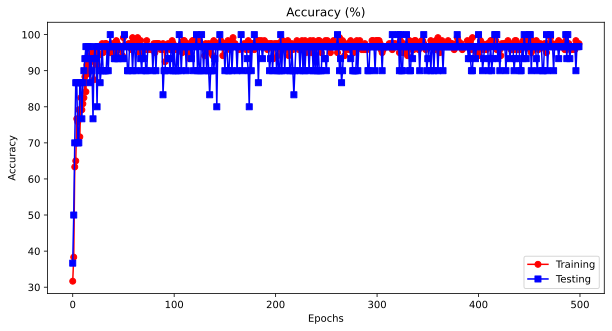

In [41]:
fig = plt.figure(figsize=(10,5))
plt.plot(train_acc, 'ro-')
plt.plot(test_acc, 'bs-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Testing'])
plt.title('Accuracy (%)')
plt.show()

In [42]:
print(f'Final training accuracy: {train_acc[-1]:.2f}')
print(f'Final testing accuracy: {test_acc[-1]:.2f}')

Final training accuracy: 97.50
Final testing accuracy: 96.67
